#第一章 统计学习方法概论

##背景：

[最小二乘法介绍](https://www.cnblogs.com/armysheng/p/3422923.html)

##最终实现：

用最小二乘法实现用多项式去拟合目标函数 $y=sin2\pi x$

##step 1
首先，为了更好理解最小二乘法，我们尝试用不使用数学库函数来实现用最小二乘法拟合一个直线 $y=0.4x+0.2$

a=0.3976139690167305,b=0.7153211410424261


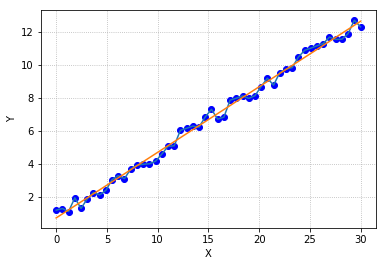

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def Least_squares(x,y):
    """
    根据公式：
    a = \frac{\sum_{i=1}^n[(x_i-\bar{x})(y_i-\bar{y})]}
    {\sum_{i=1}^n(x_i-\bar{x})^2} 
    b = -a*\bar{x} +\bar{y}
    计算
    :param x: 
    :param y: 
    :return: 
    """
    x_ = x.mean()
    y_ = y.mean()
    t1 = 0
    t2 = 0
    for xx,yy in zip(x,y):
        t1 =t1 + (xx - x_)*(yy-y_)
        t2 = (xx - x_)*(xx - x_) + t2
    a = t1 / t2
    b = -a * x_ + y_
    return a,b


#50个点
x = np.linspace(0,30,num=50)

# 加上正态分布噪音的目标函数的值
y = 0.4 * x + 0.2 + np.random.random(50)
# 最小二乘法
a,b = Least_squares(x,y)
print("a={0},b={1}".format(a,b))
y1 = a * x + b

#可视化
plt.plot(x,y,'bo',label='noise')
plt.plot(x,y,label="real")
plt.plot(x,y1,label="fitted")
plt.grid(True,ls=':')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

还是非常接近正确结果的.

##step 2

实现曲线的拟合

参考资料：

[矩阵求导过程](https://baijiahao.baidu.com/s?id=1585749800249865895&wfr=spider&for=pc)

[python实现最小二乘法](https://blog.csdn.net/appleyuchi/article/details/78162554)--本文使用了这个方法


In [2]:
# 目标函数
def real_func(x):
    return np.sin(2*np.pi*x)

# 多项式
def fit_func(p, x):
    f = np.poly1d(p)
    return f(x)

# 拟合
def fitting(x,y,order=0):
    # 利用 X*A=Y 求解
    X = np.zeros((order+1,order+1))
    # for i in range(order+1):
    #     for j in range(order+1):
    #         X[i][j] = (np.power(x[j],j+i))
    for i in range(order+1):
        for j in range(order,-1,-1):
            X[i][order - j] = (np.power(x,j+i)).sum()
        
    Y = np.zeros(order+1)
    for i in range(order+1):
        Y[i] = (np.power(x,i)*y).sum()

    #求解
    theta=np.linalg.solve(X,Y)  
    print("theta=",theta)
    
    #得到拟合后的结果
    #y1 = fit_func(theta,x)

    # 可视化
    plt.plot(np.arange(0, 1.1, 0.01), real_func(np.arange(0, 1.1, 0.01)), label='true')
    plt.plot(np.arange(0, 1.1, 0.01), fit_func(theta,np.arange(0, 1.1, 0.01)), label='fitting')
    plt.plot(x, y, 'bo', label='noise')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()
    return theta

#50个点
x = np.linspace(0,1,num=10)

# 加上正态分布噪音的目标函数的值
y = real_func(x) + np.random.uniform(0,0.2,10)

theta= [0.05310457]


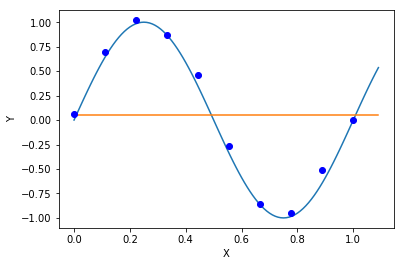

array([0.05310457])

In [3]:
#阶数为0
fitting(x,y,0)

theta= [-1.34774175  0.72697545]


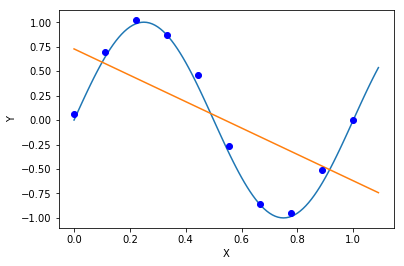

array([-1.34774175,  0.72697545])

In [4]:
#阶数为1
fitting(x,y,1)

theta= [-0.03377546 -1.31396629  0.72197167]


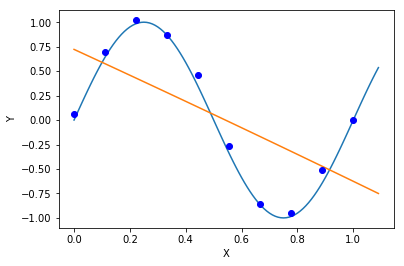

array([-0.03377546, -1.31396629,  0.72197167])

In [5]:
#阶数为2
fitting(x,y,2)

theta= [ 2.05814832e+01 -3.09060003e+01  1.03996927e+01  1.05129948e-02]


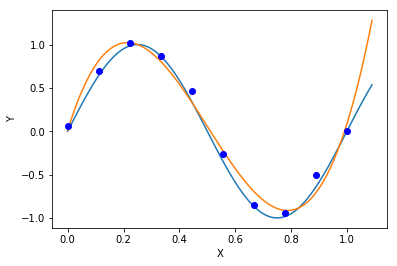

array([ 2.05814832e+01, -3.09060003e+01,  1.03996927e+01,  1.05129948e-02])

In [6]:
#阶数为3
fitting(x,y,3)

theta= [-7.43173783e+03  3.47895881e+04 -6.85949591e+04  7.38625220e+04
 -4.71033434e+04  1.80581892e+04 -4.01815310e+03  4.51347981e+02
 -1.35124238e+01  6.10214022e-02]


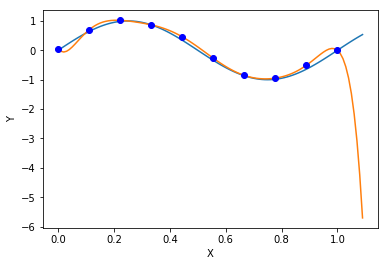

In [7]:
#阶数为9——过拟合情况
theta = fitting(x,y,9)

## step 3：加入正则化项

为了防止过拟合，可以加入正则化项

可以是参数向量的L2范数,也可以是L1范数。


In [8]:
def fitting_with_regularization(x, y,reg=0.001,order=0):
    X = np.zeros((order+1,order+1))
    for i in range(order+1):      
    # 最小二乘法,加正则化项
        X[i][order-i] = +reg
        for j in range(order,-1,-1):
            X[i][order - j] += (np.power(x,i+j)).sum()
            
                
    Y = np.zeros(order+1)
    for i in range(order+1):
        Y[i] = (np.power(x,i)*y).sum()
    
    theta = np.linalg.solve(X,Y)
    print("theta=",theta)
    
    # 可视化
    plt.plot(np.arange(0, 1.1, 0.01), real_func(np.arange(0, 1.1, 0.01)), label='true')
    plt.plot(np.arange(0, 1.1, 0.01), fit_func(theta,np.arange(0, 1.1, 0.01)), label='fitting')
    plt.plot(x, y, 'bo', label='noise')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()
    return theta



theta= [ -4.44933496  -0.53522249   2.77386423   4.87670339   4.91933291
   1.90328158  -4.53917154 -10.6881554    5.58819439   0.20646733]


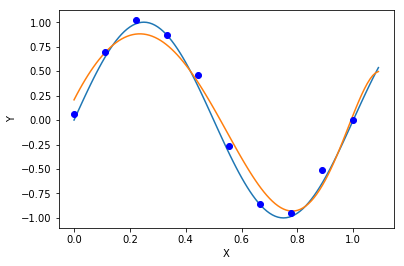

array([ -4.44933496,  -0.53522249,   2.77386423,   4.87670339,
         4.91933291,   1.90328158,  -4.53917154, -10.6881554 ,
         5.58819439,   0.20646733])

In [9]:
regularization = 0.001
fitting_with_regularization(x,y,regularization,9)

效果明显，嘿嘿